**Criteria**
1. Cross validation done systematically
2. Model Comparisons, Analyses, Selection with best CV Results
3. Comparing Results (Test/CV vs Train)
4. Baseline and Benchmark/Target Estimators
5. Fully visualised CVs
6. Any problematic issues: overfitting?
7. Needs for feature selection?

# Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Bank Customer Churn Prediction.csv')

In [ ]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
nan_count = data.isna().sum().sum()
print(f'Number of rows with missing values: {nan_count}')
print('Customer ID is redundant and will be dropped.')

Number of rows with missing values: 0
Customer ID is redundant and will be dropped.


In [3]:
data.pop('customer_id')

data_encoded = pd.get_dummies(data, columns = ['country', 'gender'])

In [ ]:
data_encoded

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,True,False,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,True,False,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,True,False,False,True,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,False,True,False,False,True


In [4]:
from sklearn.model_selection import train_test_split

churn_column = data_encoded.pop('churn')
data_encoded['churn'] = churn_column

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data_encoded.iloc[:, :-1], data_encoded.iloc[:, -1], test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=0)

In [ ]:
corr = data_encoded.corr()
corr.style.background_gradient(cmap='coolwarm')
corr

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain,gender_Female,gender_Male,churn
credit_score,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.008928,0.005538,0.004780,0.002857,-0.002857,-0.027094
age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,-0.039208,0.046897,-0.001685,0.027544,-0.027544,0.285323
tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.002848,-0.000567,0.003868,-0.014733,0.014733,-0.014001
balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,-0.231329,0.401110,-0.134892,-0.012087,0.012087,0.118533
products_number,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,0.001230,-0.010419,0.009039,0.021859,-0.021859,-0.047820
credit_card,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,0.002467,0.010577,-0.013480,-0.005766,0.005766,-0.007138
active_member,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,0.003317,-0.020486,0.016732,-0.022544,0.022544,-0.156128
estimated_salary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,-0.003332,0.010297,-0.006482,0.008112,-0.008112,0.012097
country_France,-0.008928,-0.039208,-0.002848,-0.231329,0.001230,0.002467,0.003317,-0.003332,1.000000,-0.580359,-0.575418,-0.006772,0.006772,-0.104955
country_Germany,0.005538,0.046897,-0.000567,0.401110,-0.010419,0.010577,-0.020486,0.010297,-0.580359,1.000000,-0.332084,0.024628,-0.024628,0.173488


<Axes: xlabel='credit_card', ylabel='count'>

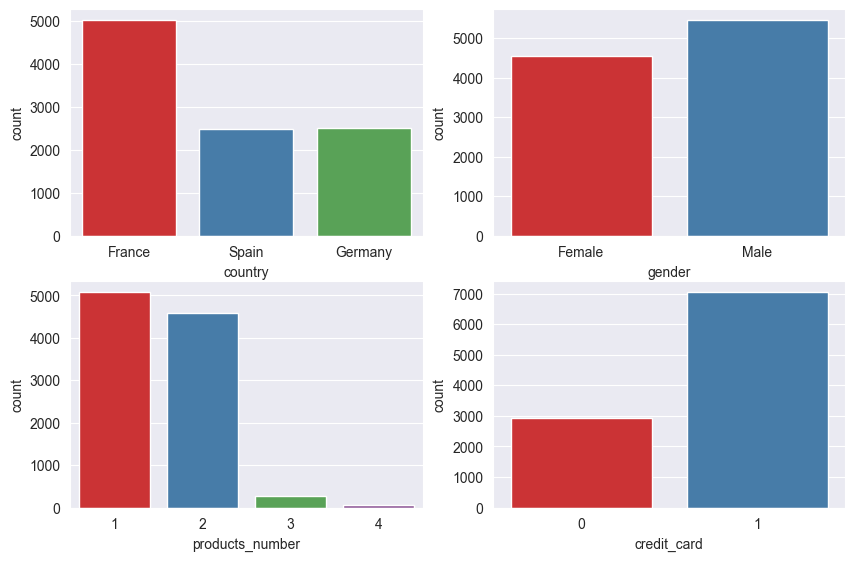

In [ ]:
plt.figure(figsize = (10,10))

plt.subplot(3,2,1)
sns.countplot(x = 'country', palette='Set1', data = data)

plt.subplot(3,2,2)
sns.countplot(x = 'gender', palette='Set1', data = data)

plt.subplot(3,2,3)
sns.countplot(x = 'products_number', palette='Set1', data = data)
plt.subplot(3,2,4)
sns.countplot(x = 'credit_card', palette='Set1', data = data)

<Axes: xlabel='churn', ylabel='count'>

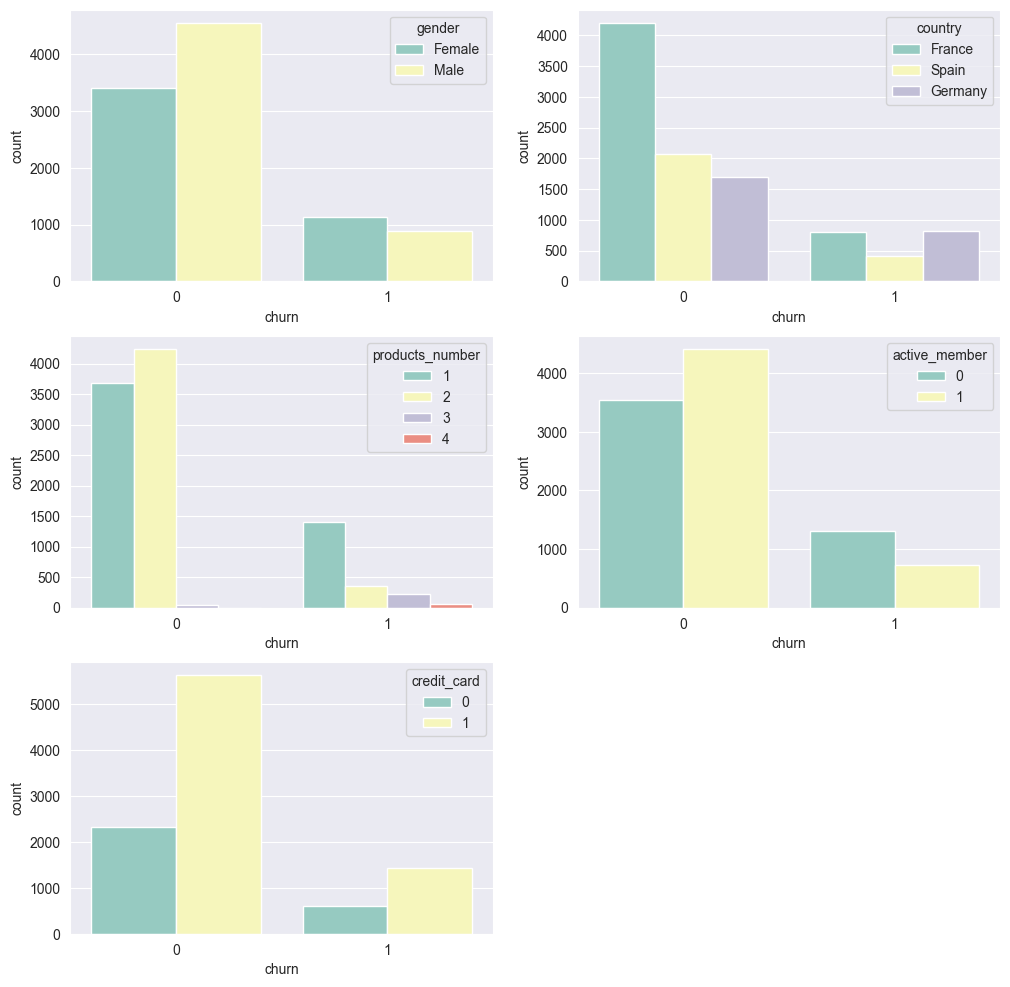

In [ ]:
plt.figure(figsize = (12,12))

plt.subplot(3,2,1)
sns.countplot(x = 'churn', hue= 'gender', palette='Set3', data = data)

plt.subplot(3,2,2)
sns.countplot(x = 'churn', hue= 'country', palette='Set3', data = data)

plt.subplot(3,2,3)
sns.countplot(x = 'churn', hue= 'products_number', palette='Set3', data = data)

plt.subplot(3,2,4)
sns.countplot(x = 'churn', hue= 'active_member', palette='Set3', data = data)

plt.subplot(3,2,5)
sns.countplot(x = 'churn', hue= 'credit_card', palette='Set3', data = data)

Customer Id, Tenure, Credit Score, products number, credit_card

# Model Estimation
## Baseline classifier

<Axes: ylabel='count'>

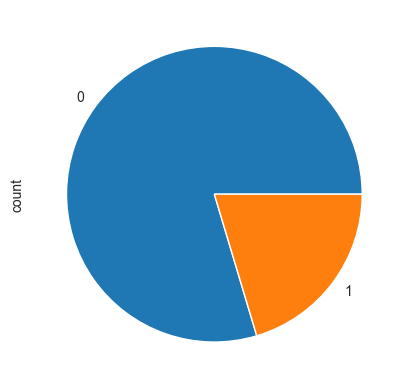

In [ ]:
data['churn'].value_counts().plot(kind='pie')

In [ ]:
churn_value = data['churn'].value_counts()
churn_value[0] / (churn_value[0] + churn_value[1])

0.7963

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

dummy_clf = DummyClassifier(random_state=42)
dummy_clf.fit(X_train, y_train)
y_val_pred = dummy_clf.predict(X_val)
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       943
           1       0.00      0.00      0.00       257

    accuracy                           0.79      1200
   macro avg       0.39      0.50      0.44      1200
weighted avg       0.62      0.79      0.69      1200


C:\Study\Week_1\venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Study\Week_1\venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Study\Week_1\venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SVC

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score,accuracy_score


svc_model = LinearSVC(random_state=0)


param_grid = {
    'penalty': ['l1', 'l2'],
    'loss': ['hinge', 'squared_hinge'],
    'dual': ["auto"]

}


scorer = make_scorer(f1_score)

grid_search_svc = GridSearchCV(
    estimator=svc_model,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,
    return_train_score=True,
    n_jobs=-1
)


grid_search_svc.fit(X_train, y_train)


best_params = grid_search_svc.best_params_
best_f1_score = grid_search_svc.best_score_


print("Best Hyperparameters:", best_params)
print("Best F1 Score:", best_f1_score)


C:\Study\Week_1\venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Study\Week_1\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Study\Week_1\venv\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Study\Week_1\venv\Lib\site-packages\sklearn\svm\_classes.py", line 315, in fit
    self.coef_, self.intercept_, n_iter_ = 

Best Hyperparameters: {'dual': 'auto', 'loss': 'squared_hinge', 'penalty': 'l1'}
Best F1 Score: 0.23664921422999985


C:\Study\Week_1\venv\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


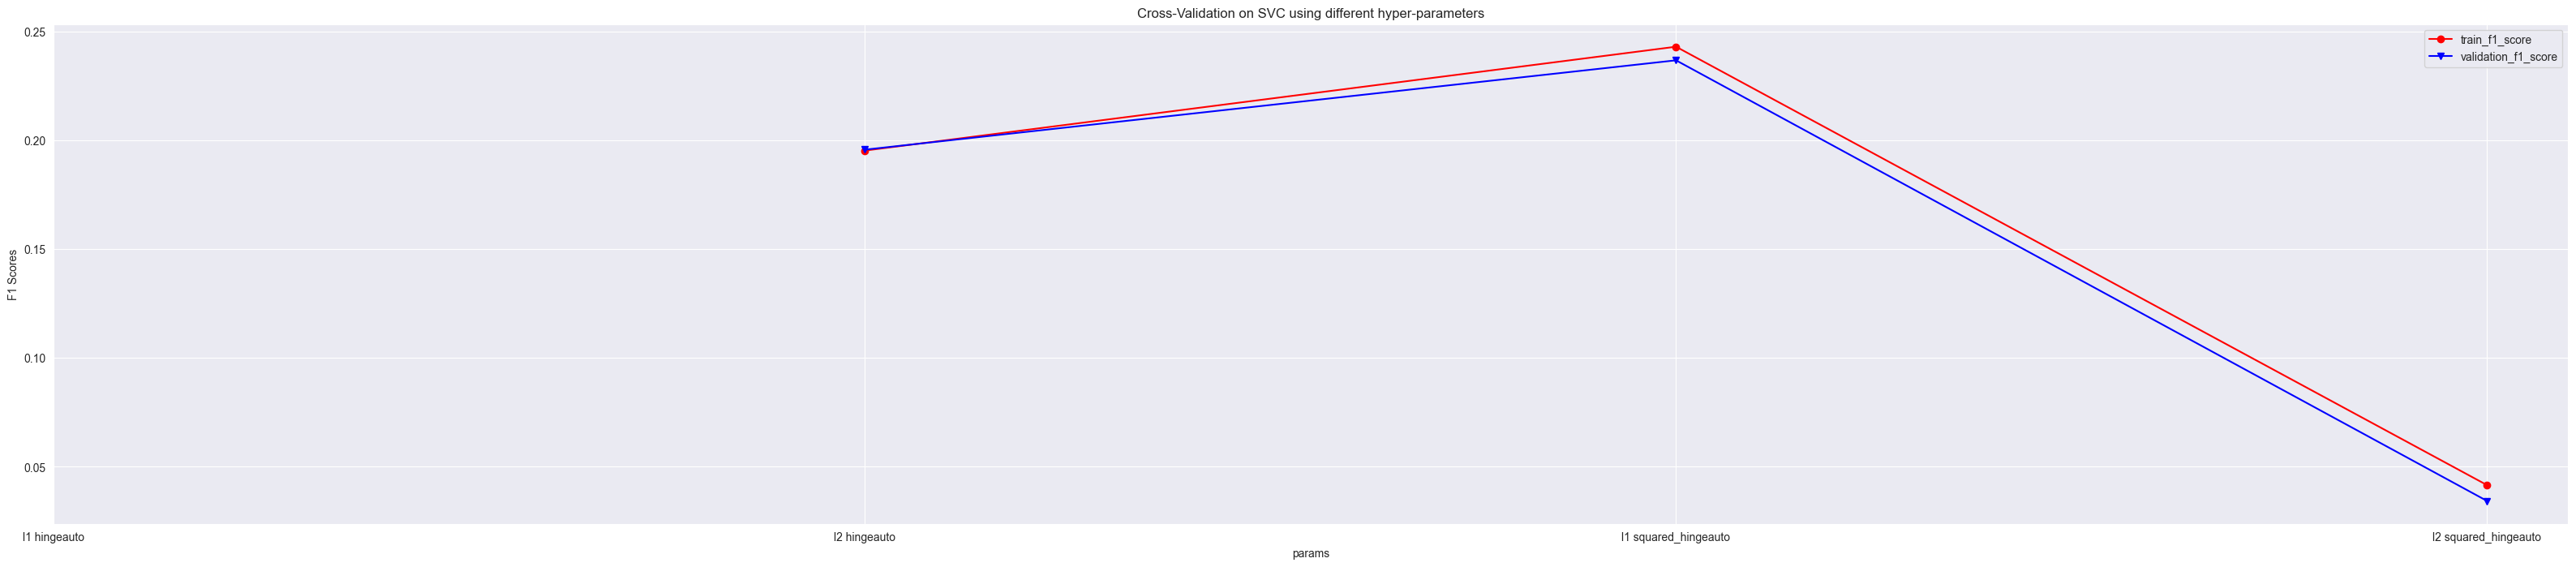

In [ ]:
result = pd.DataFrame(grid_search_svc.cv_results_)

result = result[['param_penalty', 'param_loss', 'param_dual', 'mean_test_score', 'mean_train_score']]


list3 = [str(n_e)+ " " + str(l_r) + str(s) for n_e, l_r, s in zip(result['param_penalty'], result['param_loss'], result['param_dual'])]  # here I putted all hyperparameters into one string


index = np.arange(4)
fig, ax = plt.subplots(figsize=(40, 8))
ax.plot(index,result['mean_train_score'], color='r', marker='o',label = "train_f1_score")
ax.plot(index,result['mean_test_score'], color='b', marker='v', label = "validation_f1_score")


plt.title('Cross-Validation on SVC using different hyper-parameters')
plt.ylabel('F1 Scores')
plt.xlabel('params')
plt.xticks(index, list3)
plt.legend()
plt.show()


In [ ]:
best_params = grid_search_svc.best_params_
best_penalty = best_params['penalty']
best_loss = best_params['loss']
best_dual = best_params['dual']
best_model_svc = LinearSVC(penalty=best_penalty, loss=best_loss, dual=best_dual)
best_model_svc.fit(X_train, y_train)
y_val_pred = best_model_svc.predict(X_val)

print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.88       943
           1       0.63      0.14      0.23       257

    accuracy                           0.80      1200
   macro avg       0.72      0.56      0.56      1200
weighted avg       0.77      0.80      0.74      1200


C:\Study\Week_1\venv\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


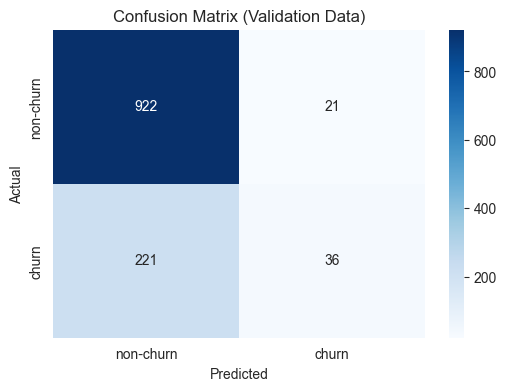

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_val, y_val_pred)


class_labels = ['non-churn', 'churn']


plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation Data)')
plt.show()

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier()


param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree']

}


scorer = make_scorer(f1_score)

grid_search_knn = GridSearchCV(
    estimator=knn_model,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,
    return_train_score=True,
    n_jobs=-1
)


grid_search_knn.fit(X_train, y_train)


best_params = grid_search_knn.best_params_
best_f1_score = grid_search_knn.best_score_


print("Best Hyperparameters:", best_params)
print("Best F1 Score:", best_f1_score)


Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
Best F1 Score: 0.18604919616377957


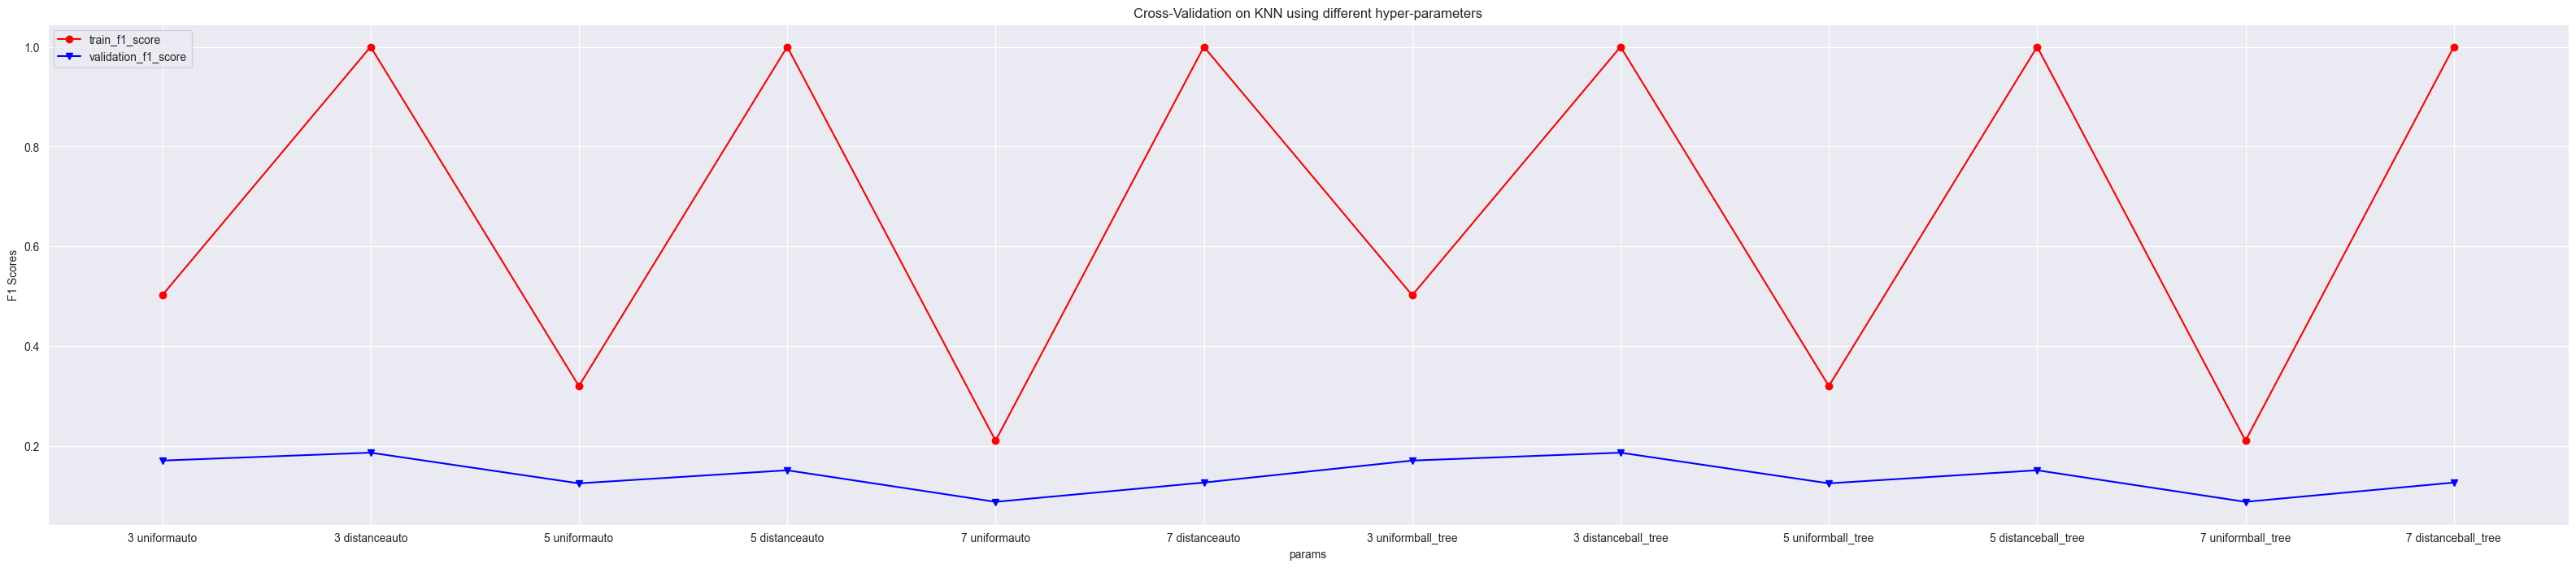

In [ ]:
result = pd.DataFrame(grid_search_knn.cv_results_)

result = result[['param_n_neighbors', 'param_weights', 'param_algorithm', 'mean_test_score', 'mean_train_score']]


list3 = [str(n_e)+ " " + str(l_r) + str(s) for n_e, l_r, s in zip(result['param_n_neighbors'], result['param_weights'], result['param_algorithm'])]  # here I putted all hyperparameters into one string


index = np.arange(12)
fig, ax = plt.subplots(figsize=(40, 8))
ax.plot(index,result['mean_train_score'], color='r', marker='o',label = "train_f1_score")
ax.plot(index,result['mean_test_score'], color='b', marker='v', label = "validation_f1_score")


plt.title('Cross-Validation on KNN using different hyper-parameters')
plt.ylabel('F1 Scores')
plt.xlabel('params')
plt.xticks(index, list3)
plt.legend()
plt.show()


In [ ]:
best_params = grid_search_knn.best_params_
best_n_neighbors = best_params['n_neighbors']
best_weights = best_params['weights']
best_algorithm = best_params['algorithm']
best_model_knn = KNeighborsClassifier(n_neighbors=best_n_neighbors, weights=best_weights, algorithm=best_algorithm)
best_model_knn.fit(X_train, y_train)
y_val_pred = best_model_knn.predict(X_val)

print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83       943
           1       0.25      0.17      0.20       257

    accuracy                           0.71      1200
   macro avg       0.52      0.52      0.51      1200
weighted avg       0.68      0.71      0.69      1200


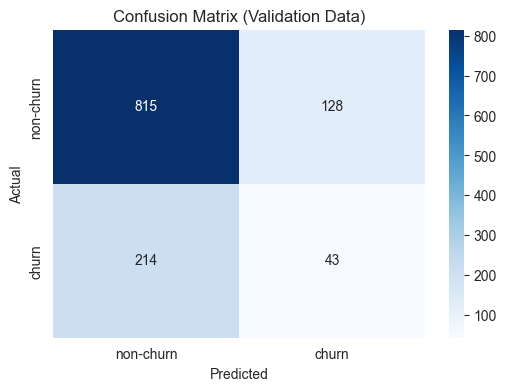

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_val, y_val_pred)


class_labels = ['non-churn', 'churn']


plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation Data)')
plt.show()

## Decision Tree Classifier


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score,accuracy_score


decision_tree_model = DecisionTreeClassifier(random_state=0)


param_grid = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 4, 6, 8],
    'max_depth': [2, 4, 5, 6]

}


scorer = make_scorer(f1_score)

grid_search_dtc = GridSearchCV(
    estimator=decision_tree_model,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,
    return_train_score=True
)


grid_search_dtc.fit(X_train, y_train)


best_params = grid_search_dtc.best_params_
best_f1_score = grid_search_dtc.best_score_


print("Best Hyperparameters:", best_params)
print("Best F1 Score:", best_f1_score)


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 8}
Best F1 Score: 0.5442639232370666


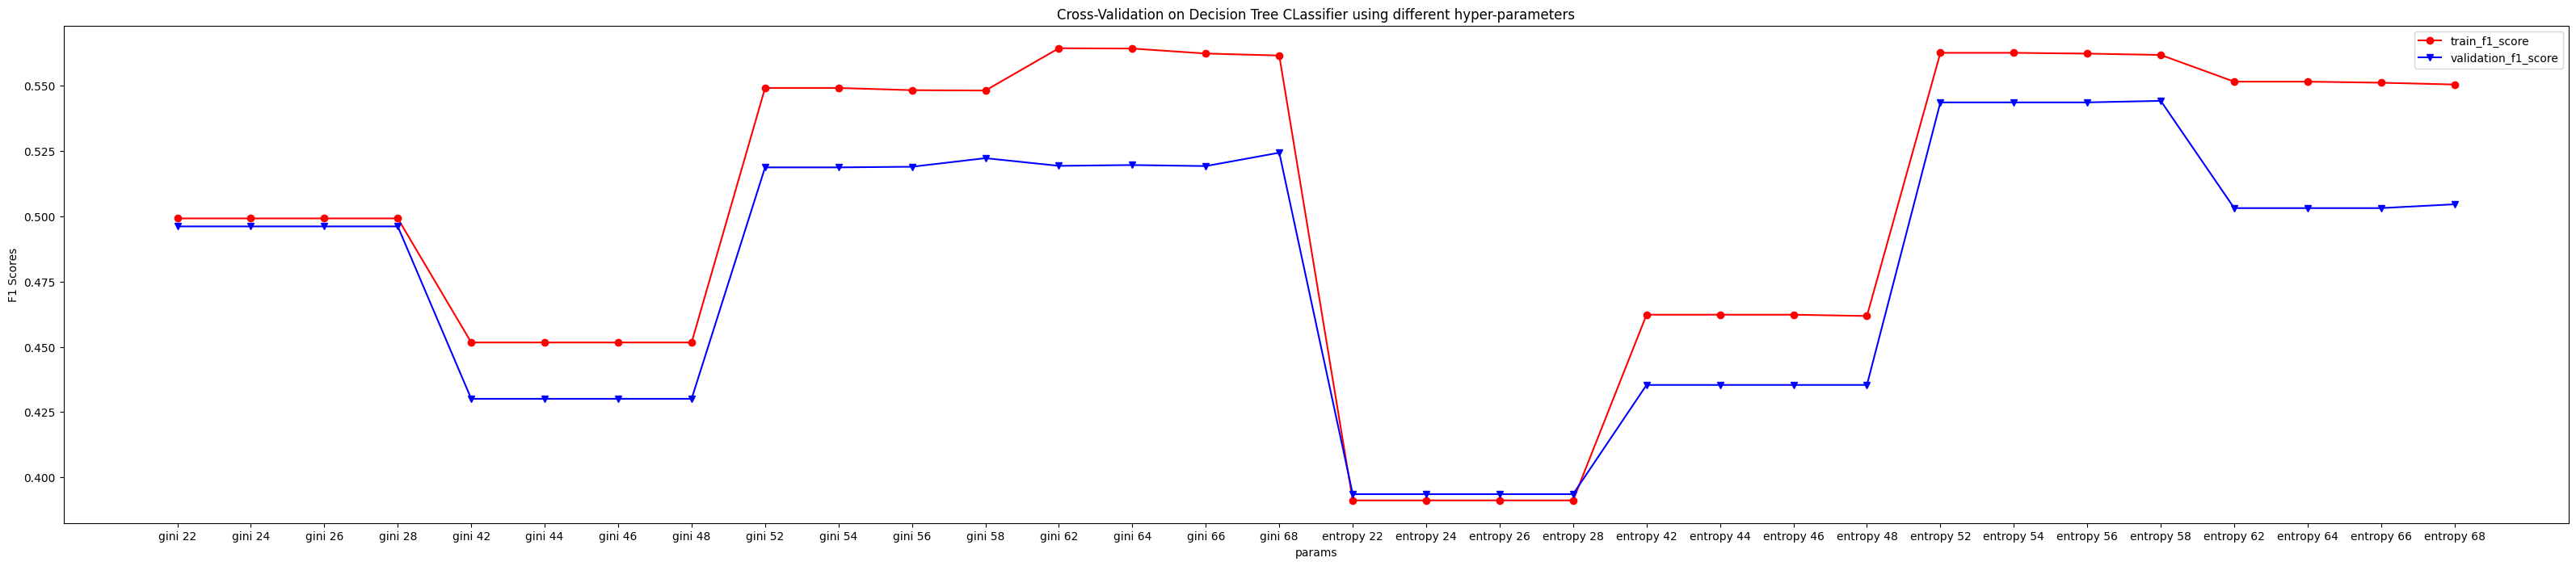

In [24]:
result = pd.DataFrame(grid_search_dtc.cv_results_)

result = result[['param_criterion', 'param_max_depth', 'param_min_samples_split', 'mean_test_score', 'mean_train_score']]




list3 = [str(n_e)+ " " + str(l_r) + str(s) for n_e, l_r, s in zip(result['param_criterion'], result['param_max_depth'], result['param_min_samples_split'])]  # here I putted all hyperparameters into one string


index = np.arange(32)
fig, ax = plt.subplots(figsize=(40, 8))
ax.plot(index,result['mean_train_score'], color='r', marker='o',label = "train_f1_score")
ax.plot(index,result['mean_test_score'], color='b', marker='v', label = "validation_f1_score")


plt.title('Cross-Validation on Decision Tree CLassifier using different hyper-parameters')
plt.ylabel('F1 Scores')
plt.xlabel('params')
plt.xticks(index, list3)
plt.legend()
plt.show()


In [25]:
best_params = grid_search_dtc.best_params_
best_criterion = best_params['criterion']
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']
new_model_dtc = DecisionTreeClassifier(criterion = best_criterion, max_depth=best_max_depth, min_samples_split = best_min_samples_split)
new_model_dtc.fit(X_train, y_train)
y_val_pred = new_model_dtc.predict(X_val)

print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       943
           1       0.83      0.44      0.58       257

    accuracy                           0.86      1200
   macro avg       0.85      0.71      0.75      1200
weighted avg       0.86      0.86      0.84      1200



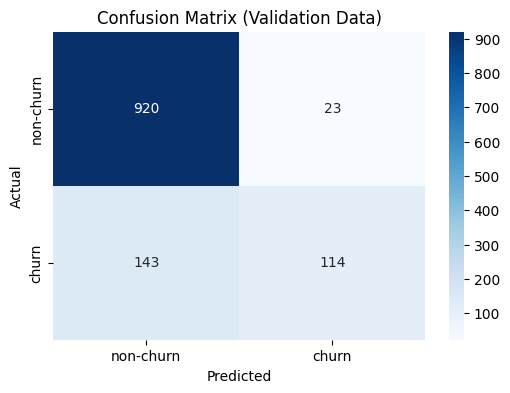

In [26]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_val, y_val_pred)


class_labels = ['non-churn', 'churn']


plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation Data)')
plt.show()

## Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score,accuracy_score
random_forest_model = RandomForestClassifier(random_state=0)


param_grid = {
    'min_samples_split': [5, 7, 9],
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 6, 8, 10],
}


scorer = make_scorer(f1_score)

grid_search_rfc = GridSearchCV(
    estimator=random_forest_model,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,
    return_train_score=True,
    n_jobs=-1
)


grid_search_rfc.fit(X_train, y_train)


best_params = grid_search_rfc.best_params_
best_f1_score = grid_search_rfc.best_score_


print("Best Hyperparameters:", best_params)
print("Best F1 Score:", best_f1_score)


Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 9, 'n_estimators': 50}
Best F1 Score: 0.5486996400412393


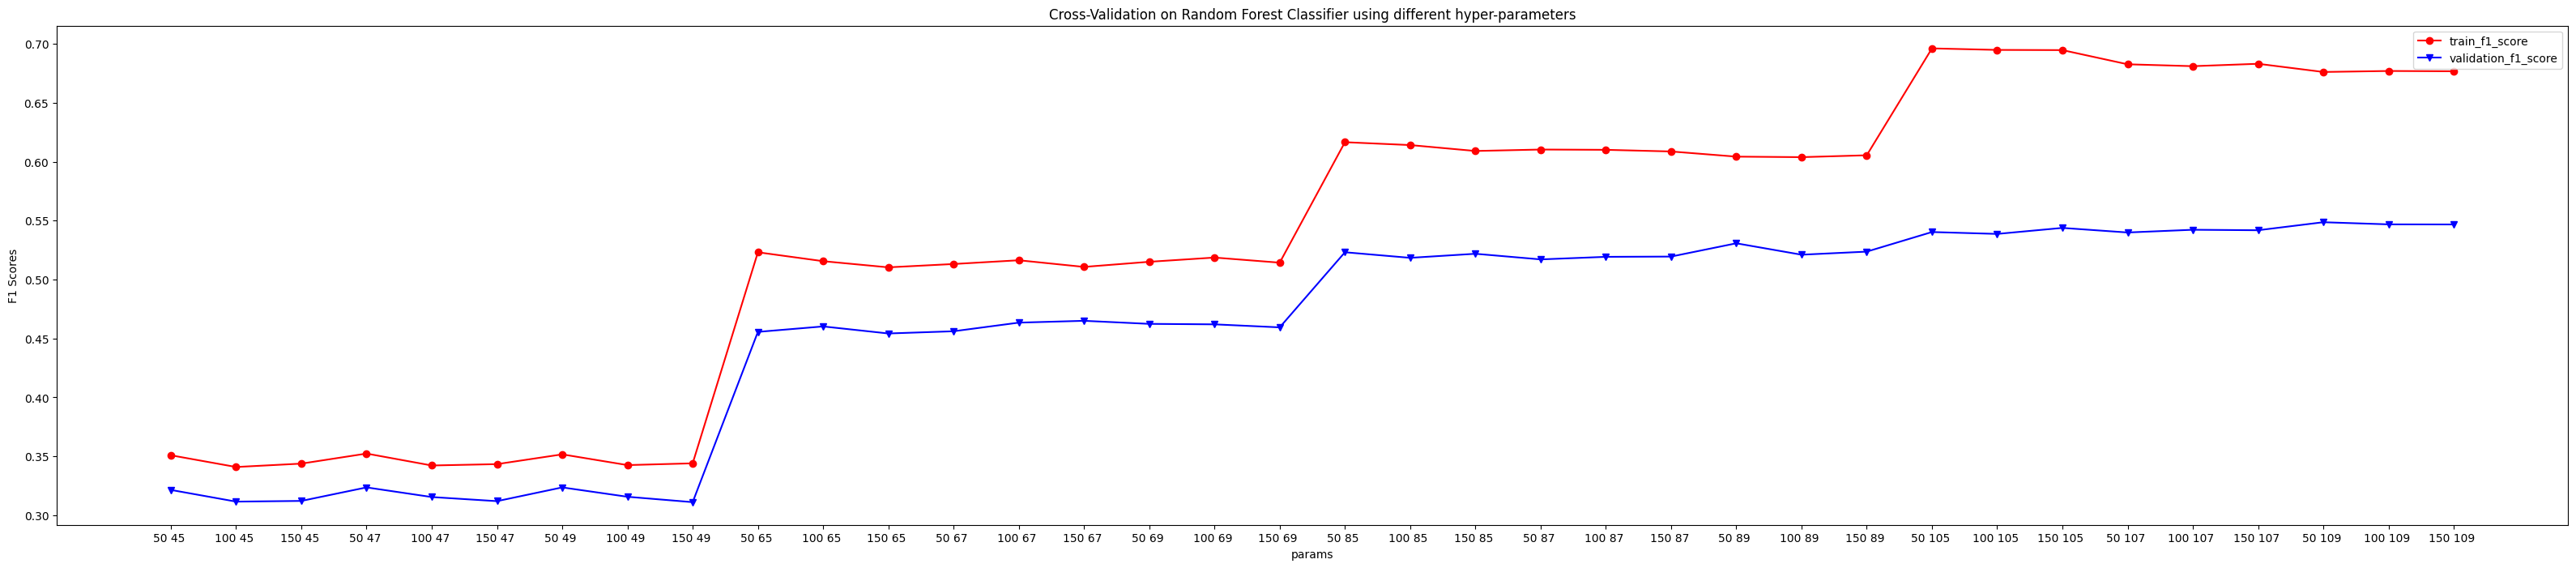

In [21]:
result = pd.DataFrame(grid_search_rfc.cv_results_)

result = result[['param_n_estimators', 'param_max_depth', 'param_min_samples_split','mean_test_score', 'mean_train_score']]




list3 = [str(n_e)+ " " + str(m_d) + str(m_s_s) + " "  for n_e, m_d, m_s_s in zip(result['param_n_estimators'], result['param_max_depth'], result['param_min_samples_split'])]  # here I putted all hyperparameters into one string


index = np.arange(36)
fig, ax = plt.subplots(figsize=(40, 8))
ax.plot(index,result['mean_train_score'], color='r', marker='o',label = "train_f1_score")
ax.plot(index,result['mean_test_score'], color='b', marker='v', label = "validation_f1_score")


plt.title('Cross-Validation on Random Forest Classifier using different hyper-parameters')
plt.ylabel('F1 Scores')
plt.xlabel('params')
plt.xticks(index, list3)
plt.legend()
plt.show()


In [22]:
from sklearn.metrics import classification_report

best_params = grid_search_rfc.best_params_
best_min_samples_split = best_params['min_samples_split']
best_max_depth = best_params['max_depth']
best_n_estimators = best_params['n_estimators']
new_model_rfc = RandomForestClassifier(n_estimators = best_n_estimators, max_depth=best_max_depth, min_samples_split = best_min_samples_split)
new_model_rfc.fit(X_train, y_train)
y_val_pred = new_model_rfc.predict(X_val)

print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.92       943
           1       0.82      0.44      0.57       257

    accuracy                           0.86      1200
   macro avg       0.84      0.71      0.74      1200
weighted avg       0.86      0.86      0.84      1200



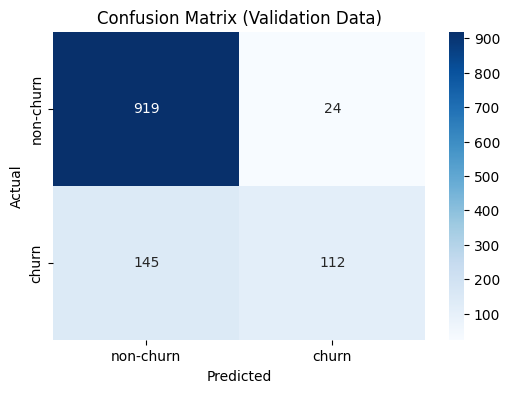

In [23]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_val, y_val_pred)


class_labels = ['non-churn', 'churn']


plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation Data)')
plt.show()

## Gradient Boosting Tree Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score,accuracy_score


gradient_boosting_model = GradientBoostingClassifier(random_state=0)


param_grid = {
    'n_estimators': [50, 100, 150,200],
    'learning_rate': [0.01, 0.1, 0.2,0.5],
    'max_features': ['sqrt', 'log2']

}


scorer = make_scorer(f1_score)

grid_search_boosting = GridSearchCV(
    estimator=gradient_boosting_model,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,
    return_train_score=True,
    n_jobs=-1
)


grid_search_boosting.fit(X_train, y_train)


best_params = grid_search_boosting.best_params_
best_f1_score = grid_search_boosting.best_score_


print("Best Hyperparameters:", best_params)
print("Best F1 Score:", best_f1_score)


Best Hyperparameters: {'learning_rate': 0.2, 'max_features': 'sqrt', 'n_estimators': 200}
Best F1 Score: 0.5911799552616765


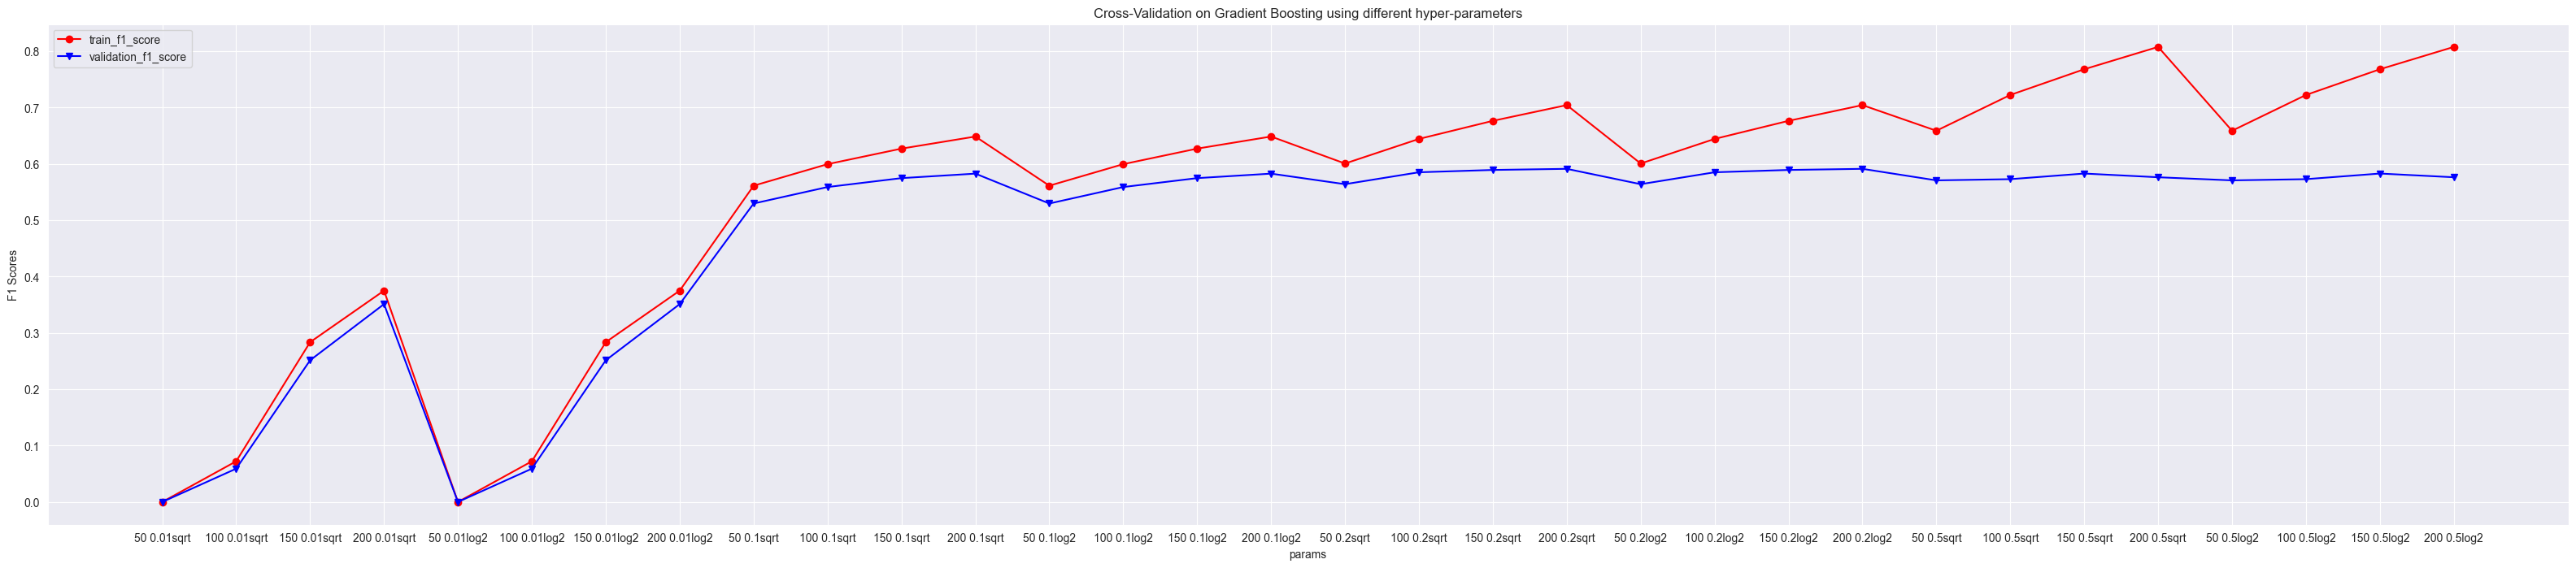

In [ ]:
result = pd.DataFrame(grid_search_boosting.cv_results_)

result = result[['param_n_estimators', 'param_learning_rate', 'param_max_features', 'mean_test_score', 'mean_train_score']]




list3 = [str(n_e)+ " " + str(l_r) + s for n_e, l_r, s in zip(result['param_n_estimators'], result['param_learning_rate'], result['param_max_features'])]  # here I putted all hyperparameters into one string


index = np.arange(32)
fig, ax = plt.subplots(figsize=(40, 8))
ax.plot(index,result['mean_train_score'], color='r', marker='o',label = "train_f1_score")
ax.plot(index,result['mean_test_score'], color='b', marker='v', label = "validation_f1_score")


plt.title('Cross-Validation on Gradient Boosting using different hyper-parameters')
plt.ylabel('F1 Scores')
plt.xlabel('params')
plt.xticks(index, list3)
plt.legend()
plt.show()


In [ ]:
best_params = grid_search_boosting.best_params_
best_n_estimators = best_params['n_estimators']
best_learning_rate = best_params['learning_rate']
best_max_features = best_params['max_features']
new_model_boosting = GradientBoostingClassifier(n_estimators = best_n_estimators, learning_rate=best_learning_rate, max_features = best_max_features)
new_model_boosting.fit(X_train, y_train)
y_val_pred = new_model_boosting.predict(X_val)

f1_s = f1_score(y_val, y_val_pred)
accuracy_boosting = accuracy_score(y_val, y_val_pred)

print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       943
           1       0.79      0.50      0.61       257

    accuracy                           0.86      1200
   macro avg       0.83      0.73      0.76      1200
weighted avg       0.86      0.86      0.85      1200


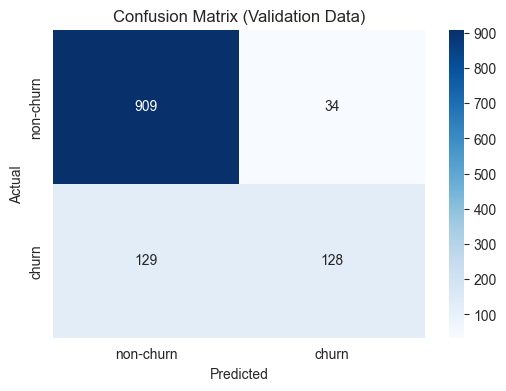

In [ ]:
conf_matrix = confusion_matrix(y_val, y_val_pred)


class_labels = ['non-churn', 'churn']


plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation Data)')
plt.show()

## Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression()


param_grid = {
    'solver': ['newton-cg', 'newton-cholesky'],
    'class_weight': [ {0: 1, 1: 2}, {0: 1, 1: 3},{0: 1, 1: 4}],
    'C': [0.01,0.1,1,10]
}


scorer = make_scorer(f1_score, average='binary')


grid_search_logistic_regression = GridSearchCV(
    estimator=logistic_regression_model,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,
    return_train_score=True
)

grid_search_logistic_regression.fit(X_train, y_train)


best_params = grid_search_logistic_regression.best_params_
best_f1_score = grid_search_logistic_regression.best_score_


print("Best Hyperparameters:", best_params)
print("Best F1 Score:", best_f1_score)

C:\Study\Week_1\venv\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Study\Week_1\venv\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Study\Week_1\venv\Lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Study\Week_1\venv\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Study\Week_1\venv\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

Best Hyperparameters: {'C': 0.01, 'class_weight': {0: 1, 1: 3}, 'solver': 'newton-cholesky'}
Best F1 Score: 0.49819804767973297


C:\Study\Week_1\venv\Lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


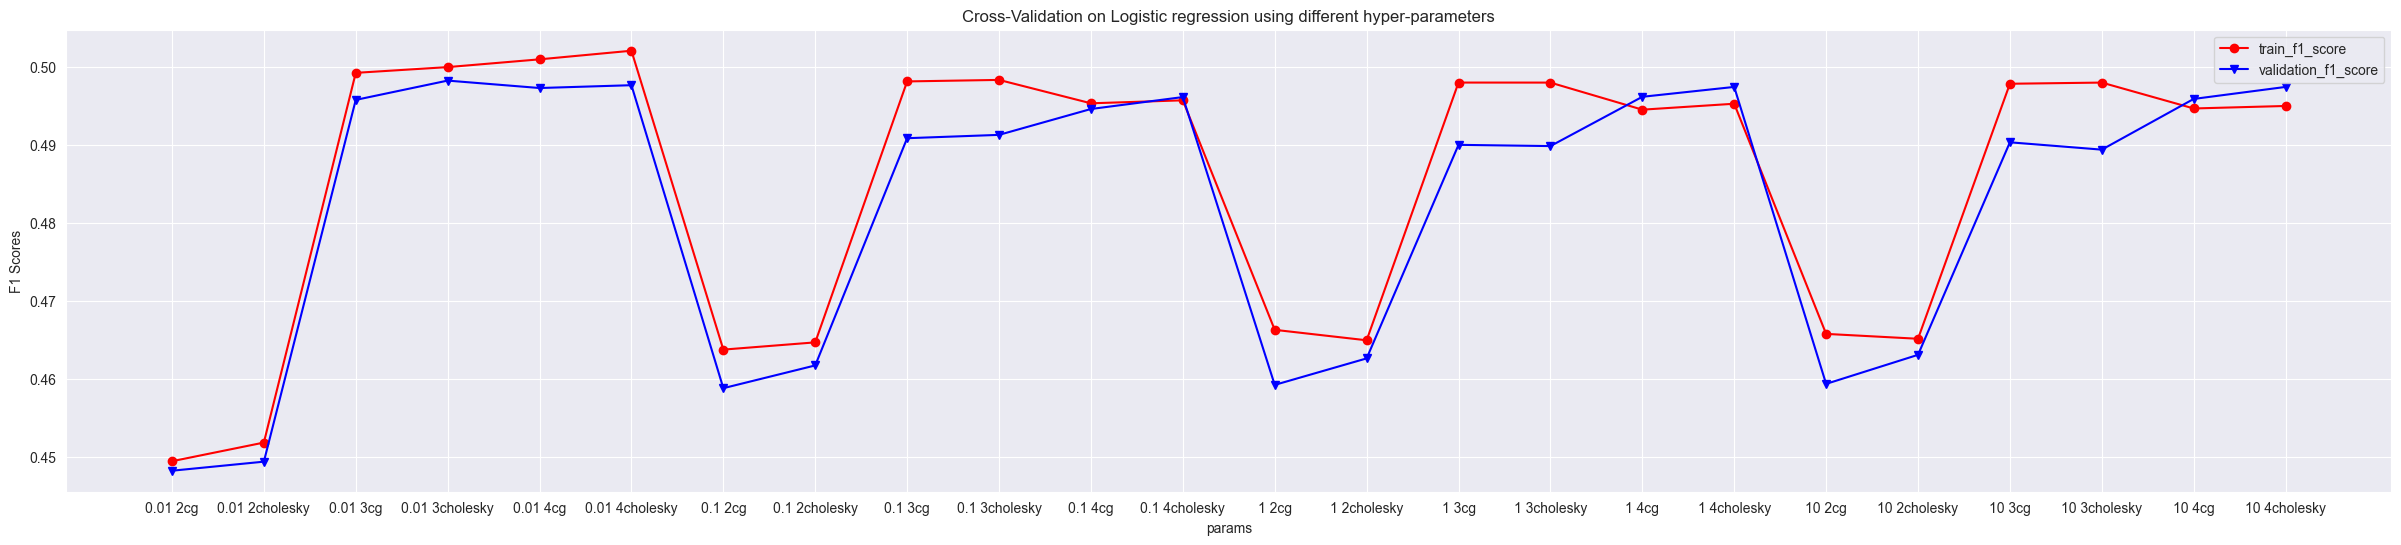

In [ ]:
result = pd.DataFrame(grid_search_logistic_regression.cv_results_)

result = result[['param_C', 'param_class_weight', 'param_solver', 'mean_test_score', 'mean_train_score']]


a = [i[1] for i in result['param_class_weight']  ]

list3 = [str(f) + " "+ str(s) + s2[7:] for f, s, s2 in zip(result['param_C'], a, result['param_solver'])]  # here I putted all hyperparameters into one string


index = np.arange(24)
fig, ax = plt.subplots(figsize=(30, 6))
ax.plot(index,result['mean_train_score'], color='r', marker='o',label = "train_f1_score")
ax.plot(index,result['mean_test_score'], color='b', marker='v', label = "validation_f1_score")


plt.title('Cross-Validation on Logistic regression using different hyper-parameters')
plt.ylabel('F1 Scores')
plt.xlabel('params')
plt.xticks(index, list3)
plt.legend()
plt.show()

In [ ]:
best_params = grid_search_logistic_regression.best_params_
best_solver = best_params['solver']
best_C = best_params['C']
best_class_weight = best_params['class_weight']
new_model_logistic = LogisticRegression(solver=best_solver, C=best_C, class_weight = best_class_weight)
new_model_logistic.fit(X_train, y_train)
y_val_pred = new_model_logistic.predict(X_val)

# f1_s = f1_score(y_val, y_val_pred)
# accuracy_logistic_regression = accuracy_score(y_val, y_val_pred)
# print(f"F1 score on validation data: {f1_s:.4f}")
# print(f"Accuraccy score on validation data: {accuracy_logistic_regression:.4f}")

print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       943
           1       0.45      0.52      0.49       257

    accuracy                           0.76      1200
   macro avg       0.66      0.68      0.67      1200
weighted avg       0.78      0.76      0.77      1200


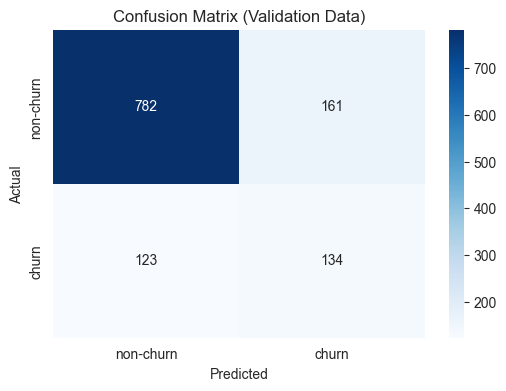

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_val, y_val_pred)


class_labels = ['non-churn', 'churn']


plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation Data)')
plt.show()


# Results on test data

From the results above we have decided to use Gradient Boosting, because of precision, recall and F1

In [ ]:
y_test_pred = new_model_boosting.predict(X_test)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.72      0.53      0.61       405

    accuracy                           0.86      2000
   macro avg       0.80      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000


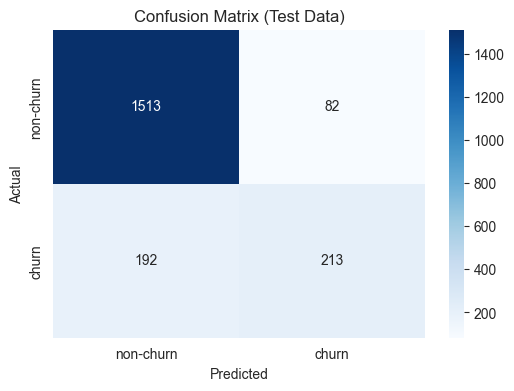

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test, y_test_pred)


class_labels = ['non-churn', 'churn']


plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Data)')
plt.show()
